<a href="https://colab.research.google.com/github/jcrpanta/Cursos-Extracurriculares-MatUson-Python/blob/main/S3_1_SymPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El módulo [`SymPy`](https://docs.sympy.org/latest/index.html) es una librería de Python que nos permite realizar cálculo simbólico. Como siempre, para poder acceder a ella y utilizar sus funciones, lo primero que debemos hacer es importarla.

*   [https://www.sympy.org/en/index.html](https://www.sympy.org/en/index.html)
*   [https://scipy-lectures.org/packages/sympy.html](https://scipy-lectures.org/packages/sympy.html)

**Maneras en las que podemos importar `SymPy`:**  


1.  `import sympy`
2. `import sympy as sym`     (*renombrar SymPy como sym*)
3. `from sympy import *`     (*importar todas las funciones de SymPy. Aunque no es muy recomendable importar de esta manera*)
4. `from sympy import 'nombre de funciones separadas por comas'`     (*importar solo algunas funciones*)

Observación:

In [ ]:
x*x   # ¿Cuál es el output?

El error se produce porque no hemos definido la variable ``x``. Podríamos definirla asignándole un valor numérico:



In [ ]:
x=3

In [ ]:
x*x

¡Pero esto no es lo que se quiere!

In [ ]:
# Importar el módulo SymPy
import sympy as sym

Una vez que hemos importado este módulo, lo siguiente es definir los __símbolos__ o __variables__ que usaremos. Por ejemplo, si vamos a realizar operaciones con la variable `x` debemos definirla de la siguiente manera:

In [ ]:
x = sym.symbols('x')

Ya con esto podemos calcular el cuadrado de ``x`` de manera simbólica:

In [ ]:
x * x

Si queremos usar las variables `x` e `y` las definiremos como:

In [ ]:
x, y = sym.symbols('x, y')

**OBSERVACIÓN:**

* Hay que advertir la diferencia entre designar el nombre de la variable en la que almacenamos una variable simbólica y el caracter usada para ésta.

Por ejemplo, podemos almanecaner la variagle simbólica `x` en una variable cuyo nombre contenga caracteres diferentes:

In [ ]:
python = sym.symbols('x')

In [ ]:
python

Luego, operar según se requiera:

In [ ]:
python * python

In [ ]:
python ** python

Podemos almanecaner la variable simbólica `pythan` en una variable cuyo nombre sea `x`:

In [ ]:
x = sym.symbols('python')

In [ ]:
x

Luego, operar según se requiera:

In [ ]:
x * x

In [ ]:
x ** x

Ya que tenemos definidos nuestros _símbolos_, podemos empezar a realizar [_cálculo simbólico_](https://docs.sympy.org/latest/tutorial/intro.html).

**Ejemplos:**

In [ ]:
sym.Rational(1,2)

In [ ]:
sym.Rational(0.5)

In [ ]:
sym.Rational(1,2) + sym.Rational(2,3)

In [ ]:
sym.Rational(1,2) * sym.pi

In [ ]:
sym.sqrt(sym.pi)

In [ ]:
sym.cos(sym.pi / 4)

# Función `sympify`

Una de las funciones más importantes, y útiles, con la que cuenta SymPy es la función `sympify` ([https://docs.sympy.org/latest/modules/core.html](https://docs.sympy.org/latest/modules/core.html)). Según su documentación, esta función **convierte una expresión arbitraria a un tipo que puede ser utilizado dentro de SymPy**. En otras palabras, convierte una expresión adecuada a una variable simbólica. Los tipos de expresiones o variables que pueden ser convertidos son:

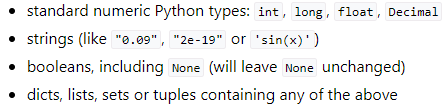

¡Notemos que en particular, podemos convertir cadenas de caracteres! Esto es de gran utilidad.

In [ ]:
sym.sympify('x')    # sintaxis

In [ ]:
type('x')

In [ ]:
type(sym.sympify('x'))

---
Una manera de explotar este tipo de conversiones es la siguiente.

---



**(1)** Declaramos una variable simbólica $x$:

In [ ]:
x = sym.symbols('x')

**(2)** Declaramos una cadena de caracteres que contenga una expresión algebraica dependiente de $x$

In [ ]:
expresion = 'x**2 + x + 1'

**(3)** Convertimos la cadena de caracteres a una variable simbólica

In [ ]:
sym_expresion = sym.sympify(expresion)
sym_expresion

**¡Ahora ya podemos operar/manipular la expresión anterior según necesitemos, como si de una expresión algebraica "escrita a mano" se tratara!**

## Evaluar una función de variable real

Podemos evaluar la expresión anterior `sym_expresion` en algún valor concreto de $x$ ([https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html](https://docs.sympy.org/latest/tutorials/intro-tutorial/basic_operations.html)). Para esto podemos utilizar, por ejemplo, la función de SymPy `subs`:

In [ ]:
sym_expresion.subs(x, 0)

In [ ]:
sym_expresion.subs(x, 1)

Notemos que lo anterior nos sugiere que podemos definir una función de Python que evalúe cualquier función (reconocible por SymPy) de variable real.

En efecto, para lo anterior, primero debemos fijar el nombre/caracter de la variable independiente, digamos $x$:

In [ ]:
def evaluar(funcion, punto):
    '''
    Evalua una función de variable real en un punto dado.

    Argumentos:

    * funcion: una cadena de caracteres que emule una función de variable real con x como variable independiente
    * punto: una variable numérica (puede ser de SymPy)

    '''
    x = sym.symbols('x')
    funcion = sym.sympify(funcion)
    return funcion.subs(x, punto)

In [ ]:
evaluar(sym_expresion, 0)

In [ ]:
evaluar(sym_expresion, sym.pi)

Prestemos atención en el siguiente caso:

In [ ]:
evaluar('a*x**2 + b*x + c', 1)

In [ ]:
evaluar('a*x**2 + b*x + c', sym.sqrt(2))

**Ejercicio.** Dé una explicación del output de la celda anterior.

Adicionalmente, es importante mencionar que además de evaluar numericamente podemos sustituir expresiones simbólicas:

In [ ]:
sym_expresion.subs(x, 'y**2')

In [ ]:
sym_expresion.subs(x, 'sin(z)')

**Nota.** Podemos definir y evaluar funciones que dependan de dos o más variables:

In [ ]:
x, y = sym.symbols('x y')
x, y

In [ ]:
F_xy = sym.sympify('x + y**2')
F_xy

In [ ]:
F_xy.subs({x: -1, y: 1})

In [ ]:
F_xy.subs({x: sym.pi, y: sym.sqrt(2)})

## Derivar una función de variable real

SymPy tiene integrado funciones que permiten realizar, en particular, operaciones del cálculo diferencial e integral.

Por ejemplo, para calcular derivadas respecto a alguna variable podemos usar la función `diff`:

In [ ]:
x = sym.symbols('x')

sym.sin(x)

In [ ]:
sym.diff(sym.sin(x), x)

Así, auxiliándonos de la función `sympify`, podemos definir una función de Python que retorne la derivada de una función de variable real $f=f(x)$:

In [ ]:
def derivada(funcion):
    x = sym.symbols('x')
    funcion = sym.sympify(funcion)
    return sym.diff(funcion, x)

In [ ]:
ff = 'x**3 - x**2 + x - c'
ff

In [ ]:
derivada(ff)

**Ejercicio.** ¿Cuál es el output de la siguiente celda?

In [ ]:
derivada('a*x**3/3 + b*x**2/2 + c*x + d')

## Integrar una función de variable real

De manera análoga al cálculo de derivadas, podemos definir una función para calcular la antiderivada de una función de variable real $f=f(x)$:

In [ ]:
def antiderivada(funcion):
    x = sym.symbols('x')
    funcion = sym.sympify(funcion)
    return sym.integrate(funcion, x)

In [ ]:
antiderivada('3*x**2')

In [ ]:
antiderivada('cos(x) - x*exp(x**2) + sqrt(x)')

También podemos calcular una integral (definida) sobre un intervalo $[a,b]$:

In [ ]:
def integral(funcion, lim_inf, lim_sup):
    x = sym.symbols('x')
    funcion = sym.sympify(funcion)
    return sym.integrate(funcion, (x, lim_inf, lim_sup))

* Ejemplos: **texto en negrita**

In [ ]:
integral('sin(x)', 0, sym.pi)

In [ ]:
integral('sin(x)', 0, 2*sym.pi)

# Método de Newton-Raphson

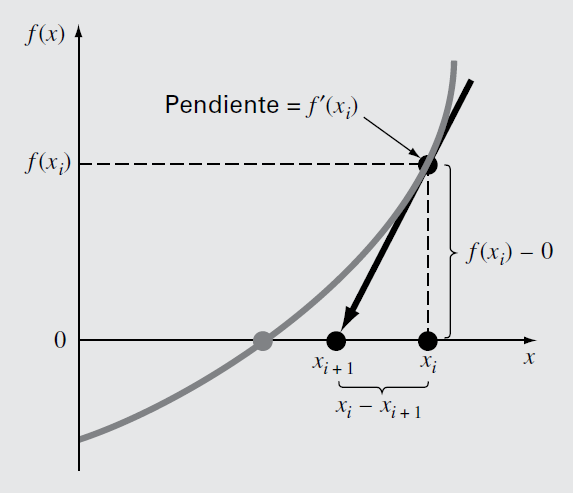

Sea $f=f(x)$ una función derivable (al menos dos veces) de variable real. Entonces:

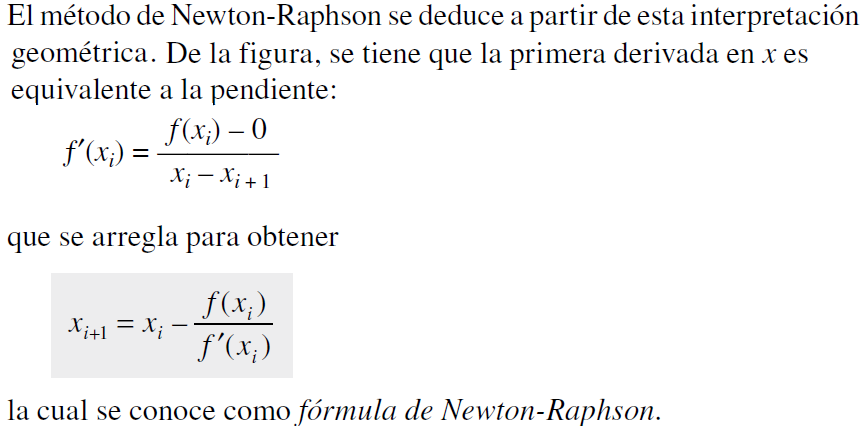

**Nota.** De ser posible, primero graficamos.

## Código_Gráfica

In [ ]:
from sympy import symbols
from sympy.plotting import plot

def graficar_funcion(funcion, aa, bb):
    if aa - bb >= 0:
        return "Debe ser a < b"
    xx = symbols('x')
    p1 = plot(funcion, (xx, aa, bb))

## Gráfica

(Para graficar, primero ejecutamos la celda de la sección "Código_Gráfica")

**Paso 1.** Escribir entre comillas (" ") la función $f=f(x)$ a graficar:


In [ ]:
funcion = "exp(-x) - x"

**Paso 2.** Ingresar los extremos del intervalo $[a,b]$ en el que se graficará la función $f$:

In [ ]:
aa = 0
bb = 2

**Paso 3.** Ejecutar la función `graficar_funcion`:

In [ ]:
graficar_funcion(funcion, aa, bb)

## Criterio de Paro (Tolerancia)

Como en otras fórmulas iterativas, el error aproximado del método de Newton-Raphson se puede calcular usando el error normalizado estimador:

$$ \varepsilon_{aprox} = \left| \frac{x_{i+1} - x_{i}}{x_{i+1}} \right|, \quad
\varepsilon_{aprox\%} = \left| \frac{x_{i+1} - x_{i}}{x_{i+1}} \right| \cdot 100 \%$$

## Código_NewtonRaphson (Base: Error Aproximado)

In [ ]:
import sympy as sym

**Nota.** Nos auxiliaremos de la función `lambdify`: [https://docs.sympy.org/latest/modules/utilities/lambdify.html](https://docs.sympy.org/latest/modules/utilities/lambdify.html). Según la documentación: *este módulo proporciona funciones prácticas para transformar expresiones SymPy en funciones lambda que pueden utilizarse para calcular valores numéricos muy rápidamente.*


In [ ]:
def NewtonRaphson(funcion, x0, Es):
    xx = sym.symbols("x")
    funcion = sym.sympify(funcion)
    d_funcion =  sym.diff(funcion, xx)
    ff = sym.lambdify(xx, funcion)
    dff = sym.lambdify(xx, d_funcion)

    iter = 1
    xi = x0
    Eraprox = 100

    while Eraprox >= (Es/100):
        x_i1 = xi - ff(xi) / dff(xi)
        Eraprox = abs((x_i1 - xi) / x_i1)
        xi = x_i1
        print(f"Iteración {iter}:  x_{iter} = {xi},  Era% = {Eraprox * 100} %")
        iter = iter + 1

    return print(f"\nEl valor de la raíz es: {xi}")

## Newton-Raphson

(Primero ejecutamos la celda de la sección "Código_NewtonRaphson")

In [ ]:
funcion = "x^10 - 1"
x0 = 0.5
Es = 1  #En porcentaje

In [ ]:
NewtonRaphson(funcion, x0, Es)